In [ ]:
pip install fbprophet

In [4]:

from google.colab import drive
drive.mount('/content/drive')

# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Mounted at /content/drive
Prophet 0.7.1


In [ ]:
# load the dataset
import pandas as pd
from pandas import read_csv
# load data
X = pd.read_csv('/content/drive/My Drive/CA4015/sleep_classify/extracted_features.csv')
Y = pd.read_csv('/content/drive/My Drive/CA4015/sleep_classify/extracted_features_labels.csv')
# summarize shape
print(X.shape)
print(Y.shape)
# show first few rows
print(X.head())
print(Y.head())

In [6]:
full_df = pd.concat([Y[["time", "1"]], X[X.columns[2:]]], axis=1)
print(full_df.shape)

(26417, 271)


In [ ]:
# add subject id back in
full_df = pd.concat([Y[["time", "1", "id"]], X[X.columns[2:]]], axis=1)
full_df

In [ ]:
# convert time column into fbProphet-friendly datetime format
full_df = full_df.rename(columns={"time": "ds", "1": "y"})
full_df["ds"] = full_df['ds'] = pd.to_datetime(full_df['ds'], unit='s')
full_df

In [9]:
dfs = dict(tuple(full_df.groupby('id')))

In [11]:
id_list = list(full_df['id'])
id_set = set(id_list)
id_list = list(id_set)

In [16]:
from fbprophet import Prophet

In [17]:
for subject, df in dfs.items():
  model = Prophet()
  model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Dis

In [22]:

model = Prophet()
model.fit(dfs[46343])


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = model.make_future_dataframe(periods=20, freq ="30S")
future.tail()

,ds
569,1970-01-01 04:51:00
570,1970-01-01 04:51:30
571,1970-01-01 04:52:00
572,1970-01-01 04:52:30
573,1970-01-01 04:53:00


In [37]:
forecast = model.predict(future)

In [38]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:06:30,1.024940,-0.585054,2.441879,1.024940,1.024940,0.0,0.0,0.0,0.0,0.0,0.0,1.024940
1,1970-01-01 00:07:00,1.041096,-0.387736,2.552626,1.041096,1.041096,0.0,0.0,0.0,0.0,0.0,0.0,1.041096
2,1970-01-01 00:07:30,1.057251,-0.462829,2.460306,1.057251,1.057251,0.0,0.0,0.0,0.0,0.0,0.0,1.057251
3,1970-01-01 00:08:00,1.073407,-0.372403,2.632245,1.073407,1.073407,0.0,0.0,0.0,0.0,0.0,0.0,1.073407
4,1970-01-01 00:08:30,1.089563,-0.420982,2.540670,1.089563,1.089563,0.0,0.0,0.0,0.0,0.0,0.0,1.089563


In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


,ds,yhat,yhat_lower,yhat_upper
544,1970-01-01 04:38:30,0.711770,-0.778800,2.141895
545,1970-01-01 04:39:00,0.698411,-0.908538,2.244029
546,1970-01-01 04:39:30,0.685053,-0.860167,2.187700
547,1970-01-01 04:40:00,0.671695,-0.864382,2.103134
548,1970-01-01 04:40:30,0.658336,-0.952764,2.189860
549,1970-01-01 04:41:00,0.644978,-0.772786,2.096793
550,1970-01-01 04:41:30,0.631620,-0.852280,2.161277
551,1970-01-01 04:42:00,0.618261,-0.880884,2.132853
552,1970-01-01 04:42:30,0.604903,-0.889690,1.922476
553,1970-01-01 04:43:00,0.591545,-0.923570,2.141272


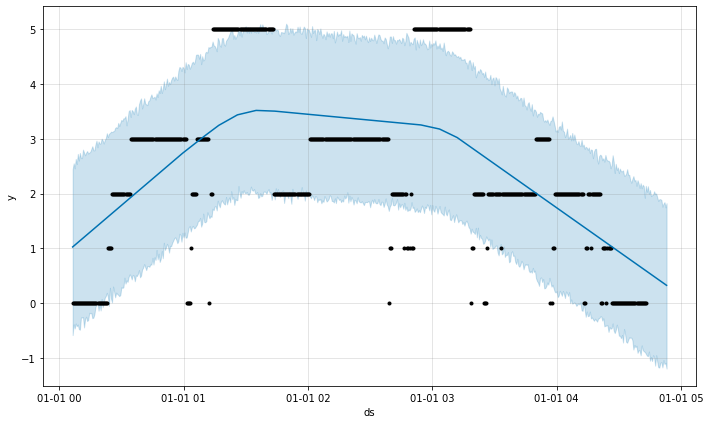

In [40]:
plot1 = model.plot(forecast)

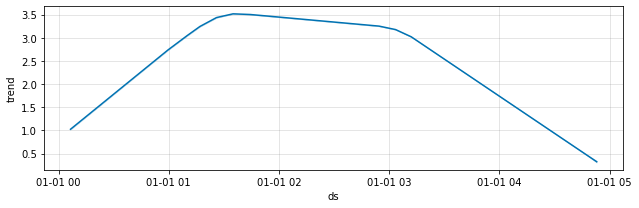

In [41]:
plot2 = model.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()